# Random Forrest Classifier

#### Modules

In [82]:
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use('ggplot')


#### Prepare Data

In [83]:
# read data
data = pd.read_pickle('merged_data.pkl') 

# identfiy numerical volumns
columns = ['danceability','energy','key','loudness','mode',
 'speechiness','acousticness','instrumentalness',
 'liveness','valence','tempo','time_signature','disc_number','duration_ms','is_hit']

df = data[columns] # get numerical columns
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,is_hit
0,0.670,0.428,3,-10.161,0,0.0369,0.537000,0.000003,0.1180,0.326,100.033,4,1,289596,0
1,0.694,0.645,1,-6.841,0,0.1970,0.012600,0.007210,0.0595,0.549,171.877,4,1,357581,0
2,0.750,0.641,1,-4.191,1,0.0743,0.272000,0.000010,0.1080,0.593,99.998,4,1,232888,0
3,0.638,0.845,0,-4.358,1,0.0407,0.000815,0.000418,0.0503,0.201,93.031,4,1,215022,0
4,0.685,0.509,6,-8.606,0,0.1120,0.212000,0.754000,0.0704,0.464,93.986,4,1,276063,0


In [84]:
corr = df.corr()
corr.style.background_gradient()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,is_hit
danceability,1,-0.0307221,-0.0176443,0.110433,0.031025,0.0169999,-0.237438,-0.110361,-0.167252,0.209298,0.0919414,0.187353,-0.00846383,-0.02725,0.0245688
energy,-0.0307221,1,0.0255558,0.705914,-0.0216373,-0.0534092,-0.410767,-0.121164,0.12931,0.295124,0.0968102,0.142835,-0.0328389,0.166108,-0.0234342
key,-0.0176443,0.0255558,1,-0.00204073,-0.226802,0.0147894,0.0333137,0.000125216,0.00264804,0.063116,-0.00921671,-0.00791777,-0.0052129,0.000245873,-0.00321796
loudness,0.110433,0.705914,-0.00204073,1,-0.00729253,-0.254723,-0.40188,-0.208576,-0.0343086,0.129657,0.118785,0.169317,-0.0150317,0.240739,0.0324012
mode,0.031025,-0.0216373,-0.226802,-0.00729253,1,0.0227058,-0.0204371,-0.00507762,0.0216288,-0.0363017,0.00408898,0.0010387,-0.00687203,-0.0245781,0.000671308
speechiness,0.0169999,-0.0534092,0.0147894,-0.254723,0.0227058,1,0.163634,-0.110668,0.195499,0.176812,-0.0115067,-0.0199101,-0.0278163,-0.217248,-0.0247312
acousticness,-0.237438,-0.410767,0.0333137,-0.40188,-0.0204371,0.163634,1,0.100265,0.0504112,0.00496561,-0.159633,-0.184516,0.0520334,-0.18833,-0.0162062
instrumentalness,-0.110361,-0.121164,0.000125216,-0.208576,-0.00507762,-0.110668,0.100265,1,-0.0309193,-0.099386,-0.00310834,-0.0600284,0.0550499,-0.0325334,-0.0284674
liveness,-0.167252,0.12931,0.00264804,-0.0343086,0.0216288,0.195499,0.0504112,-0.0309193,1,0.0803656,-0.037132,-0.0273446,-0.00590766,-0.0734659,-0.039548
valence,0.209298,0.295124,0.063116,0.129657,-0.0363017,0.176812,0.00496561,-0.099386,0.0803656,1,0.0200906,0.0617661,-0.0173415,-0.0992332,-0.0411966


#### Consider Training on select features

In [87]:
# without loudness
df2 = df.copy()
df2 = df2.drop('loudness',axis=1) 

# without energy
df3 = df.copy()
df3 = df3.drop('energy',axis=1)

In [88]:
X = df.drop('is_hit', axis=1) # features for model
y = df['is_hit'] # target variable

#### Split Data into train test set

In [89]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Feature Scaling

In [90]:
#### Feature Scaling (Optional)
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#X_test = sc.transform(X_test)  

# feature scaling is not important for random forrest models

#### Create Random Forrest Model

In [91]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

#### Evaluating Performance

In [92]:
# cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")

In [93]:
print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_predict))
x = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(x)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
Predicted     0    1
Actual              
0          8673  124
1           695  440


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.95      8797
           1       0.78      0.39      0.52      1135

   micro avg       0.92      0.92      0.92      9932
   macro avg       0.85      0.69      0.74      9932
weighted avg       0.91      0.92      0.90      9932

=== All AUC Scores ===
[0.5719918  0.64519264 0.55765231 0.65958514 0.63075798 0.56524015
 0.55871405 0.69151941 0.60442156 0.61677035]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6101845386523747


**Confusion Matrix** : Tells us false positives and false negatives. <br>
**Classification Report** : Tells us the accuracy of the classifier in classifying the data points in that particular class compared to all other classes <br>
The **ROC curve** plots out the true positive rate versus the false positive rate at various thresholds.<br>
The **roc_auc scoring** used in the cross-validation model shows the area under the ROC curve. <br>

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. We used 10 fold cross validation to compute the AUC for each fold. then we returned all AUC Scores for each fold respectively. We computed the mean of these as well. <br> 

* 1 is an indication our model has perfect separability <br>
* 0.5 is an indication our model has no separability <br>
* 0 is an indication our model is worst and is recipricating the result<br>

In [94]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.9175392670157068


Perhaps we can remove some unimportant features to improve the score of the model (AUC).

# Feature Importance 

In [97]:
importances = list(rfc.feature_importances_)
feature_list = list(df.drop('is_hit', axis=1).columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
items = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: loudness             Importance: 0.11
Variable: tempo                Importance: 0.11
Variable: danceability         Importance: 0.1
Variable: speechiness          Importance: 0.1
Variable: acousticness         Importance: 0.1
Variable: valence              Importance: 0.1
Variable: duration_ms          Importance: 0.1
Variable: energy               Importance: 0.09
Variable: liveness             Importance: 0.09
Variable: key                  Importance: 0.05
Variable: instrumentalness     Importance: 0.04
Variable: mode                 Importance: 0.01
Variable: time_signature       Importance: 0.01
Variable: disc_number          Importance: 0.0


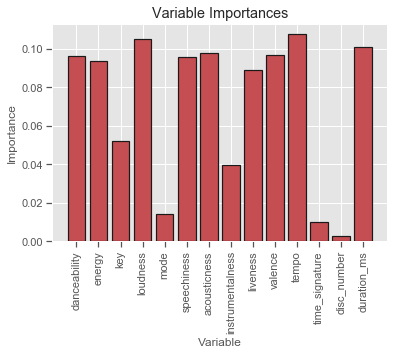

In [98]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

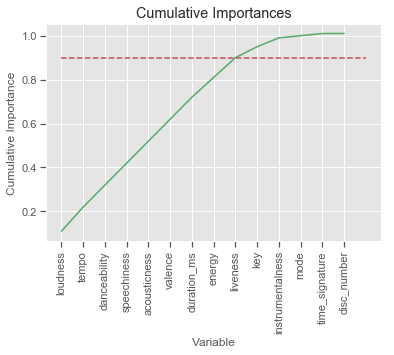

In [118]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

We set an arbritrary threshold of 95% importance. Any additional feature that adds past this threshold is uncessary and will be considered an unimportant feature

#### Refit RandomForrest Model with important features

In [119]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:9]]

# Create training and testing sets with only the important features
important_X = X[important_feature_names] # this removes unimportant features
y = y # y remains the same

# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_predict))
x = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
print(x)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
Predicted     0    1
Actual              
0          8782   15
1           725  410


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8797
           1       0.96      0.36      0.53      1135

   micro avg       0.93      0.93      0.93      9932
   macro avg       0.94      0.68      0.74      9932
weighted avg       0.93      0.93      0.91      9932

=== All AUC Scores ===
[0.61922733 0.65113259 0.56845515 0.69975156 0.6602332  0.57684999
 0.6027908  0.74934286 0.62516088 0.63422114]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6387165501538115


In [120]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.9254933548127265


This model is better as we get a better AUC score of 63.9.

# Hyperparameter Tuning

In [40]:
print('Parameters currently in use:\n')
print(rfc.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [65]:
# we got high accuracy
# Random forrest are not affected y overfitting when changing the number of forests/trees/n
# however, all ML can be overfitted
# use cross validation and AUC to see overfit

#### Sources
## Implementing Random Forrest
# https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd
# https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

## what is a good AUC?
# http://gim.unmc.edu/dxtests/roc3.htm
# https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

# measuring model
# AUC vs standard accuracy
# https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy

# Hyperparameter Tuning
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74